In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
game_stats_2017 = pd.read_csv('game_stats_2018.csv',index_col=[0])
game_stats_2018 = pd.read_csv('game_stats_2018.csv',index_col=[0])
game_stats_2019 = pd.read_csv('game_stats_2019.csv',index_col=[0])
game_stats_2021 = pd.read_csv('game_stats_2021.csv',index_col=[0])
game_stats_2022 = pd.read_csv('game_stats_2022.csv',index_col=[0])
game_scoring_2017 = pd.read_csv('game_scoring_2017.csv',index_col=[0])
game_scoring_2018 = pd.read_csv('game_scoring_2018.csv',index_col=[0])
game_scoring_2019 = pd.read_csv('game_scoring_2019.csv',index_col=[0])
game_scoring_2021 = pd.read_csv('game_scoring_2021.csv',index_col=[0])
game_scoring_2022 = pd.read_csv('game_scoring_2022.csv',index_col=[0])

In [3]:
#Here is where I will concatenate all the years data into current stats

In [4]:
scoring = pd.concat([game_scoring_2017, game_scoring_2018, game_scoring_2019, game_scoring_2021, game_scoring_2022],axis=0)
stats = pd.concat([game_stats_2017, game_stats_2018, game_stats_2019, game_stats_2021, game_stats_2022],axis=0)
stats.rename(columns={'id':'game_id'},inplace=True)

In [5]:
scoring.head()

,game_id,week,team_id,school,points,date,venue_id,venue,neutral_site,opponent,...,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home,year
0,400953933.0,1.0,50.0,Florida A&M,29.0,2017-08-26T16:00:00.000Z,3650.0,Bragg Memorial Stadium,False,Texas Southern,...,7.0,13.0,9.0,0.0,0.0,0.0,0.0,7.0,1,2017
1,400935282.0,1.0,36.0,Colorado State,58.0,2017-08-26T18:30:00.000Z,5388.0,Canvas Stadium,False,Oregon State,...,7.0,17.0,10.0,24.0,10.0,10.0,0.0,7.0,1,2017
2,400945031.0,1.0,252.0,BYU,20.0,2017-08-26T19:00:00.000Z,3801.0,LaVell Edwards Stadium,False,Portland State,...,7.0,7.0,0.0,6.0,0.0,6.0,0.0,0.0,1,2017
3,400938887.0,1.0,113.0,UMass,35.0,2017-08-26T22:00:00.000Z,3985.0,Warren McGuirk Alumni Stadium,False,Hawai'i,...,7.0,7.0,14.0,7.0,7.0,7.0,7.0,17.0,1,2017
4,400951507.0,1.0,55.0,Jacksonville State,27.0,2017-08-26T22:30:00.000Z,3689.0,Cramton Bowl,True,Chattanooga,...,10.0,0.0,10.0,7.0,3.0,3.0,0.0,7.0,1,2017


In [6]:
stats.head()

,game_id,school,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401012246,Alabama,17-26,0.0,21,0-0,1,0,1.0,70.0,...,3.0,25.0,9.5,10-15,NaN,10-111,519,1,11.4,5.3
1,401012246,Louisville,20-39,0.0,19,0-1,0,1,NaN,NaN,...,1.0,28.0,2.0,4-14,NaN,11-93,268,2,6.5,0.6
2,401012247,Arkansas,21-29,0.0,18,0-0,0,4,NaN,NaN,...,2.0,40.0,8.0,7-15,0.0,4-40,433,0,12.2,2.2
3,401012247,Eastern Illinois,27-40,0.0,21,3-4,5,0,NaN,NaN,...,1.0,42.0,6.0,6-18,6.0,6-30,357,5,5.8,3.1
4,401012248,Auburn,26-36,0.0,27,1-1,0,1,0.0,0.0,...,5.0,38.0,9.0,9-18,1.0,12-103,420,0,7.6,3.3


In [7]:
game_stats = scoring.merge(stats,how='left',on=['game_id','school'])

In [8]:
stats_df = game_stats[game_stats['game_id'].notnull()].copy()
stats_df = stats_df[stats_df['neutral_site']==False].copy()

In [9]:
stats_df.fillna(0,inplace=True)

In [10]:
stats_df[stats_df['school']=='Michigan'].head()

,game_id,week,team_id,school,points,date,venue_id,venue,neutral_site,opponent,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
152,400935243.0,2.0,130.0,Michigan,36.0,2017-09-09T16:00:00.000Z,3558.0,Michigan Stadium,False,Cincinnati,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
256,400935352.0,3.0,130.0,Michigan,29.0,2017-09-16T16:00:00.000Z,3558.0,Michigan Stadium,False,Air Force,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
688,400935372.0,6.0,130.0,Michigan,10.0,2017-10-07T23:30:00.000Z,3558.0,Michigan Stadium,False,Michigan State,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
945,400935393.0,9.0,130.0,Michigan,35.0,2017-10-28T16:00:00.000Z,3558.0,Michigan Stadium,False,Rutgers,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1155,400935398.0,10.0,130.0,Michigan,33.0,2017-11-05T00:30:00.000Z,3558.0,Michigan Stadium,False,Minnesota,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0


In [11]:
stats_df['date'] = pd.to_datetime(stats_df['date']).dt.tz_localize(None).dt.date

stats_df['totalPenalties'] = stats_df['totalPenaltiesYards'].str.split('-').str[0]
stats_df['totalPenaltyYards'] = stats_df['totalPenaltiesYards'].str.split('-').str[1]

stats_df['completions'] = stats_df['completionAttempts'].str.split('-').str[0]
stats_df['completionAttempts'] = stats_df['completionAttempts'].str.split('-').str[1]
stats_df.dropna(inplace=True)

stats_df['completions'] = stats_df['completions'].astype(int)
stats_df['completionAttempts'] = stats_df['completionAttempts'].astype(int)

stats_df['completion_percentage'] = stats_df['completions'] / stats_df['completionAttempts']

In [12]:
#Dropping 4th down column because I havent figured out how to split a string on -- and -
stats_df.drop(columns=['fourthDownEff','neutral_site','thirdDownEff'],inplace=True)

In [13]:
stats_df.dtypes

game_id                  float64
week                     float64
team_id                  float64
school                    object
points                   float64
date                      object
venue_id                 float64
venue                     object
opponent                  object
points_allowed           float64
opponent_id              float64
points_q1                float64
points_q2                float64
points_q3                float64
points_q4                float64
points_allowed_q1        float64
points_allowed_q2        float64
points_allowed_q3        float64
points_allowed_q4        float64
is_home                    int64
year                       int64
completionAttempts         int64
defensiveTDs             float64
firstDowns               float64
fumblesLost              float64
fumblesRecovered         float64
interceptionTDs          float64
interceptionYards        float64
interceptions            float64
kickReturnTDs            float64
kickReturn

In [14]:
stats_df['possessionMins'] = stats_df['possessionTime'].str.split(':').str[0]
stats_df['possessionSecs'] = stats_df['possessionTime'].str.split(':').str[1]

In [15]:
stats_df['possessionMins'].fillna(method='ffill', inplace=True)
stats_df['possessionSecs'].fillna(method='ffill', inplace=True)
stats_df['timeOfPossession'] = ((stats_df['possessionMins'].astype(int) * 60) + stats_df['possessionSecs'].astype(int))

stats_df.drop(columns=['possessionMins', 'possessionSecs','possessionTime'],inplace=True)

In [16]:
stats_df.head()

,game_id,week,team_id,school,points,date,venue_id,venue,opponent,points_allowed,...,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt,totalPenalties,totalPenaltyYards,completions,completion_percentage,timeOfPossession
2804,401013357.0,1.0,113.0,UMass,63.0,2018-08-25,3985.0,Warren McGuirk Alumni Stadium,Duquesne,15.0,...,4-30,572.0,1.0,10.4,7.2,4,30,19,0.678571,1600
2805,401013357.0,1.0,113.0,UMass,63.0,2018-08-25,3985.0,Warren McGuirk Alumni Stadium,Duquesne,15.0,...,4-30,572.0,1.0,10.4,7.2,4,30,19,0.678571,1600
2806,401014972.0,1.0,242.0,Rice,31.0,2018-08-25,3895.0,Rice Stadium,Prairie View,28.0,...,7-54,397.0,0.0,3.6,6.2,7,54,12,0.500000,2379
2807,401014972.0,1.0,242.0,Rice,31.0,2018-08-25,3895.0,Rice Stadium,Prairie View,28.0,...,7-54,397.0,0.0,3.6,6.2,7,54,12,0.500000,2379
2809,401022510.0,1.0,36.0,Colorado State,34.0,2018-08-25,5388.0,Canvas Stadium,Hawai'i,43.0,...,12-120,653.0,1.0,10.5,4.6,12,120,34,0.666667,1517


In [17]:
#stats_df['totalPenalties'] = stats_df['totalPenalties'].astype(int(float))
#stats_df['totalPenaltyYards'] = stats_df['totalPenaltyYards'].astype(int(float))

In [18]:
stats_df.columns

Index(['game_id', 'week', 'team_id', 'school', 'points', 'date', 'venue_id',
       'venue', 'opponent', 'points_allowed', 'opponent_id', 'points_q1',
       'points_q2', 'points_q3', 'points_q4', 'points_allowed_q1',
       'points_allowed_q2', 'points_allowed_q3', 'points_allowed_q4',
       'is_home', 'year', 'completionAttempts', 'defensiveTDs', 'firstDowns',
       'fumblesLost', 'fumblesRecovered', 'interceptionTDs',
       'interceptionYards', 'interceptions', 'kickReturnTDs',
       'kickReturnYards', 'kickReturns', 'kickingPoints', 'netPassingYards',
       'passesDeflected', 'passesIntercepted', 'passingTDs', 'puntReturnTDs',
       'puntReturnYards', 'puntReturns', 'qbHurries', 'rushingAttempts',
       'rushingTDs', 'rushingYards', 'sacks', 'tackles', 'tacklesForLoss',
       'totalFumbles', 'totalPenaltiesYards', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'totalPenalties',
       'totalPenaltyYards', 'completions', 'completion_percentage',
   

In [19]:
corr = stats_df.corr()
most_corr = corr.index[abs(corr['points'])>0.4]

In [20]:
most_corr

Index(['points', 'points_q1', 'points_q2', 'points_q3', 'points_q4',
       'firstDowns', 'kickingPoints', 'netPassingYards', 'passingTDs',
       'rushingTDs', 'rushingYards', 'totalYards', 'yardsPerPass',
       'yardsPerRushAttempt', 'completion_percentage'],
      dtype='object')

<AxesSubplot:>

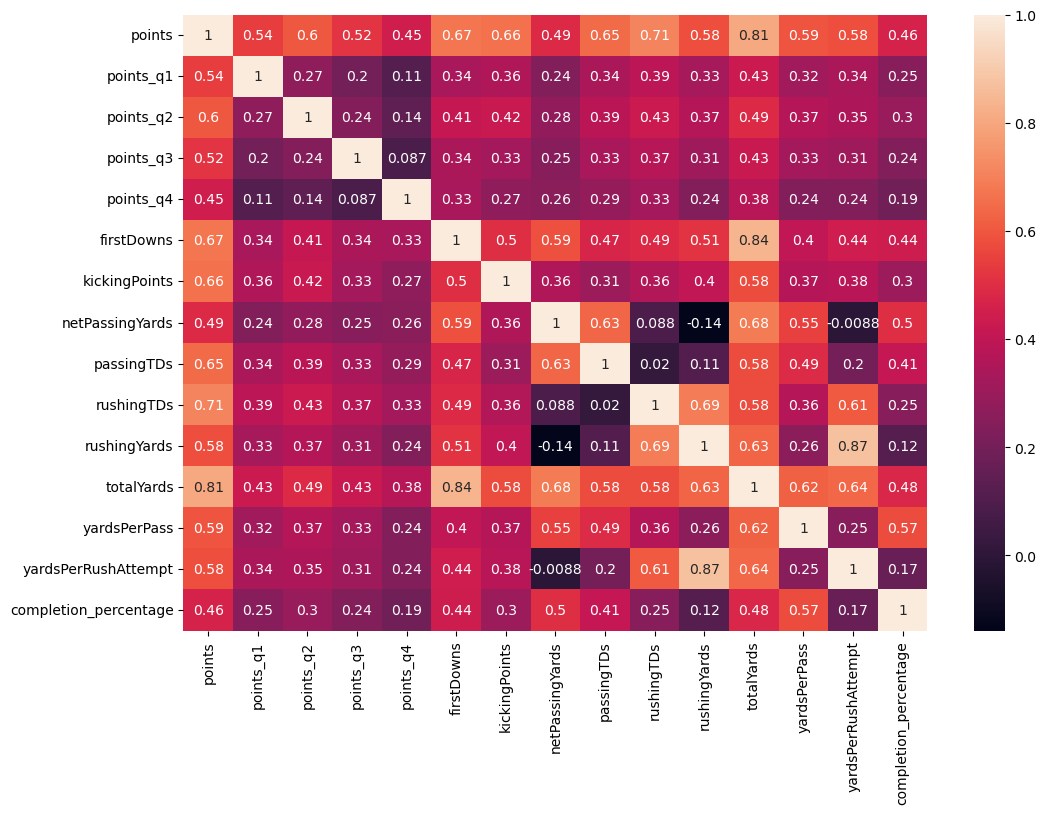

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(stats_df[most_corr].corr(),annot=True)

In [22]:
stats_df_important = stats_df[['year','week','team_id','points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage']].copy()

In [23]:
#Get averages per game for each of the most correlated statistics

In [24]:
stats_df_important

,year,week,team_id,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
2804,2018,1.0,113.0,63.0,14.0,21.0,24.0,9.0,290.0,4.0,4.0,282.0,572.0,10.4,7.2,0.678571
2805,2018,1.0,113.0,63.0,14.0,21.0,24.0,9.0,290.0,4.0,4.0,282.0,572.0,10.4,7.2,0.678571
2806,2018,1.0,242.0,31.0,6.0,0.0,22.0,11.0,87.0,0.0,3.0,310.0,397.0,3.6,6.2,0.500000
2807,2018,1.0,242.0,31.0,6.0,0.0,22.0,11.0,87.0,0.0,3.0,310.0,397.0,3.6,6.2,0.500000
2809,2018,1.0,36.0,34.0,0.0,13.0,29.0,4.0,537.0,5.0,0.0,116.0,653.0,10.5,4.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,2022,12.0,38.0,7.0,0.0,0.0,10.0,1.0,123.0,1.0,0.0,79.0,202.0,5.6,2.4,0.318182
21516,2022,12.0,23.0,31.0,0.0,0.0,17.0,5.0,257.0,4.0,0.0,84.0,341.0,8.6,3.0,0.666667
21517,2022,12.0,278.0,41.0,0.0,0.0,26.0,11.0,361.0,2.0,3.0,163.0,524.0,8.6,4.9,0.690476
21518,2022,12.0,254.0,17.0,0.0,0.0,22.0,5.0,170.0,0.0,1.0,156.0,326.0,4.5,4.3,0.552632


In [25]:
#Add in year to the group by when you get all the data added

In [26]:
grouped_stats_df = stats_df_important.groupby(by=['team_id','week', 'year'])[['points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage']].mean().reset_index()

In [27]:
grouped_stats_df.head()

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
0,2.0,1.0,2021,60.0,24.0,16.0,28.0,10.0,297.0,3.0,5.0,316.0,613.0,11.0,9.9,0.814815
1,2.0,1.0,2022,42.0,14.0,14.0,22.0,6.0,212.0,1.0,5.0,285.0,497.0,10.1,7.0,0.619048
2,2.0,2.0,2018,63.0,21.0,7.0,28.0,9.0,138.0,1.0,6.0,429.0,567.0,9.9,7.3,0.571429
3,2.0,2.0,2019,24.0,14.0,7.0,20.0,6.0,207.0,1.0,2.0,172.0,379.0,5.6,3.8,0.513514
4,2.0,2.0,2021,62.0,14.0,35.0,21.0,14.0,174.0,3.0,3.0,364.0,538.0,9.2,9.3,0.578947


In [28]:
grouped_stats_df[(grouped_stats_df['team_id']==130.0)].sort_values(by=['year','week'])

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
1601,130.0,1.0,2018,17.0,10.0,0.0,20.0,5.0,249.0,0.0,1.0,58.0,307.0,6.9,1.8,0.666667
1605,130.0,2.0,2018,49.0,14.0,7.0,20.0,7.0,143.0,4.0,3.0,308.0,451.0,7.9,8.8,0.722222
1609,130.0,3.0,2018,45.0,21.0,14.0,21.0,9.0,237.0,3.0,2.0,197.0,434.0,13.2,4.8,0.777778
1612,130.0,4.0,2018,56.0,19.0,10.0,21.0,12.0,206.0,2.0,4.0,285.0,491.0,6.6,6.3,0.580645
1616,130.0,5.0,2018,20.0,7.0,6.0,18.0,8.0,196.0,0.0,2.0,180.0,376.0,8.2,4.3,0.625000
1620,130.0,6.0,2018,42.0,14.0,10.0,24.0,10.0,294.0,3.0,1.0,171.0,465.0,10.5,4.3,0.714286
1624,130.0,7.0,2018,38.0,13.0,8.0,22.0,12.0,124.0,0.0,3.0,320.0,444.0,6.2,6.7,0.700000
1627,130.0,8.0,2018,21.0,7.0,7.0,19.0,3.0,212.0,2.0,1.0,183.0,395.0,8.5,3.5,0.560000
1633,130.0,10.0,2018,42.0,7.0,14.0,20.0,6.0,144.0,2.0,3.0,259.0,403.0,8.5,5.0,0.647059
1637,130.0,11.0,2018,42.0,14.0,14.0,24.0,6.0,260.0,3.0,3.0,193.0,453.0,9.6,4.8,0.666667


In [48]:
final_df = []
for id_ in grouped_stats_df['team_id'].unique():
    team_df = grouped_stats_df[grouped_stats_df['team_id'] == id_].sort_values(by=['year','week'], ascending=True).copy()
    for col in team_df.columns:
        if col != 'week' and col != 'team_id' and col != 'year':
            team_df[col] = team_df[col].rolling(3).mean()
        else:
            team_df[col] = team_df[col]
        final_df.append(team_df)

In [49]:
final_df = pd.concat(final_df)
final_df.drop_duplicates(inplace=True)

In [50]:
final_df

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
2,2.0,2.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,3.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2.0,4.0,2018,39.333333,14.000000,7.000000,20.000000,7.333333,156.666667,0.666667,3.666667,216.666667,373.333333,7.700000,4.400000,0.608225
14,2.0,5.0,2018,26.333333,9.333333,7.000000,10.666667,6.333333,192.333333,1.000000,2.000000,105.666667,298.000000,6.866667,2.866667,0.609668
18,2.0,6.0,2018,22.333333,4.666667,5.666667,9.333333,8.333333,197.666667,0.666667,1.333333,92.333333,290.000000,6.366667,3.166667,0.585859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,124179.0,6.0,2022,6.333333,0.000000,3.333333,13.666667,2.333333,147.333333,0.000000,0.666667,83.666667,231.000000,6.033333,2.200000,0.542344
7176,124179.0,11.0,2022,4.000000,0.000000,1.000000,13.000000,2.000000,121.666667,0.000000,0.333333,83.666667,205.333333,5.066667,2.200000,0.494909
7177,125730.0,1.0,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7178,126086.0,2.0,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
len(grouped_stats_df[(grouped_stats_df['team_id']==333.0) & (grouped_stats_df['year']==2018)])

10

In [52]:
final_df[(final_df['team_id']==333.0) & (final_df['year']==2018)]

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
4026,333.0,2.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,333.0,3.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4034,333.0,4.0,2018,54.666667,19.666667,11.333333,25.666667,10.666667,347.333333,4.666667,2.000000,199.000000,546.333333,11.533333,5.000000,0.708601
4038,333.0,5.0,2018,54.333333,19.666667,10.333333,25.666667,10.333333,353.666667,4.000000,2.666667,195.666667,549.333333,14.933333,4.833333,0.749549
4042,333.0,6.0,2018,55.333333,19.333333,9.333333,24.666667,9.333333,382.666667,4.000000,3.000000,207.666667,590.333333,18.566667,5.233333,0.782618
4045,333.0,7.0,2018,53.333333,19.333333,5.333333,25.000000,10.666667,371.000000,3.666667,2.666667,232.666667,603.666667,18.600000,5.300000,0.741204
4049,333.0,8.0,2018,54.000000,17.000000,8.333333,26.333333,10.666667,366.666667,3.666667,3.000000,216.000000,582.666667,14.900000,5.100000,0.689120
4054,333.0,10.0,2018,42.000000,13.666667,8.000000,28.000000,8.666667,334.000000,3.000000,2.333333,227.666667,561.666667,9.966667,5.633333,0.628274
4057,333.0,11.0,2018,37.000000,10.333333,7.333333,27.333333,6.333333,261.666667,2.333333,2.666667,213.666667,475.333333,7.733333,5.333333,0.627039
4061,333.0,12.0,2018,34.333333,6.666667,11.000000,24.333333,6.333333,276.333333,2.333333,2.000000,204.333333,480.666667,9.100000,6.366667,0.677520


In [53]:
preseason_df = grouped_stats_df[grouped_stats_df['week'] < 3]

In [54]:
preseason_df.head()

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
0,2.0,1.0,2021,60.0,24.0,16.0,28.0,10.0,297.0,3.0,5.0,316.0,613.0,11.0,9.9,0.814815
1,2.0,1.0,2022,42.0,14.0,14.0,22.0,6.0,212.0,1.0,5.0,285.0,497.0,10.1,7.0,0.619048
2,2.0,2.0,2018,63.0,21.0,7.0,28.0,9.0,138.0,1.0,6.0,429.0,567.0,9.9,7.3,0.571429
3,2.0,2.0,2019,24.0,14.0,7.0,20.0,6.0,207.0,1.0,2.0,172.0,379.0,5.6,3.8,0.513514
4,2.0,2.0,2021,62.0,14.0,35.0,21.0,14.0,174.0,3.0,3.0,364.0,538.0,9.2,9.3,0.578947


In [55]:
rolling_df = final_df[final_df['week'] >=3]

In [56]:
rolling_df.head()

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
6,2.0,3.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2.0,4.0,2018,39.333333,14.000000,7.000000,20.000000,7.333333,156.666667,0.666667,3.666667,216.666667,373.333333,7.700000,4.400000,0.608225
14,2.0,5.0,2018,26.333333,9.333333,7.000000,10.666667,6.333333,192.333333,1.000000,2.000000,105.666667,298.000000,6.866667,2.866667,0.609668
18,2.0,6.0,2018,22.333333,4.666667,5.666667,9.333333,8.333333,197.666667,0.666667,1.333333,92.333333,290.000000,6.366667,3.166667,0.585859
22,2.0,7.0,2018,19.000000,4.666667,3.333333,12.333333,7.000000,260.333333,1.333333,0.666667,104.000000,364.333333,6.666667,3.566667,0.561484


In [57]:
complete_df = pd.concat([preseason_df,rolling_df],axis=0)

In [59]:
complete_df[complete_df['team_id']==130.0].sort_values(by=['year','week'],ascending=True)

,team_id,week,year,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
1601,130.0,1.0,2018,17.000000,10.000000,0.000000,20.000000,5.000000,249.000000,0.000000,1.000000,58.000000,307.000000,6.900000,1.800000,0.666667
1605,130.0,2.0,2018,49.000000,14.000000,7.000000,20.000000,7.000000,143.000000,4.000000,3.000000,308.000000,451.000000,7.900000,8.800000,0.722222
1609,130.0,3.0,2018,37.000000,15.000000,7.000000,20.333333,7.000000,209.666667,2.333333,2.000000,187.666667,397.333333,9.333333,5.133333,0.722222
1612,130.0,4.0,2018,50.000000,18.000000,10.333333,20.666667,9.333333,195.333333,3.000000,3.000000,263.333333,458.666667,9.233333,6.633333,0.693548
1616,130.0,5.0,2018,40.333333,15.666667,10.000000,20.000000,9.666667,213.000000,1.666667,2.666667,220.666667,433.666667,9.333333,5.133333,0.661141
1620,130.0,6.0,2018,39.333333,13.333333,8.666667,21.000000,10.000000,232.000000,1.666667,2.333333,212.000000,444.000000,8.433333,4.966667,0.639977
1624,130.0,7.0,2018,33.333333,11.333333,8.000000,21.333333,10.000000,204.666667,1.000000,2.000000,223.666667,428.333333,8.300000,5.100000,0.679762
1627,130.0,8.0,2018,33.666667,11.333333,8.333333,21.666667,8.333333,210.000000,1.666667,1.666667,224.666667,434.666667,8.400000,4.833333,0.658095
1633,130.0,10.0,2018,33.666667,9.000000,9.666667,20.333333,7.000000,160.000000,1.333333,2.333333,254.000000,414.000000,7.733333,5.066667,0.635686
1637,130.0,11.0,2018,35.000000,9.333333,11.666667,21.000000,5.000000,205.333333,2.333333,2.333333,211.666667,417.000000,8.866667,4.433333,0.624575
